# Подключение необходимых библиотек

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Загрузка данных

In [5]:
df = pd.read_csv("penguins_size.csv")

In [6]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Описание данных

Признаки:

- species - вид пингвина

- island - остров, где был найден

- culmen_length_mm - длина клюва пингвина в миллиметрах

- culmen_depth_mm - глубина клюва пингвина в миллиметрах
  
- flipper_length_mm - длина ласты пингвина в миллиметрах

- body_mass_g - масса тела пингвина в граммах

- sex - пол пингвина
  

## Стадии решения задачи
- подключение модулей (import modules)
- загрузка данных (data lodaing)
- разведочный анализ данных (exploratory data analysis, EDA)
- предварительная обработка данных (preprocessing)
- визуальный анализ(Visual analysis)
- обучение моделей (models fitting)
- прогнозирование (prediction)

In [9]:
df.shape

(344, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [11]:
df.describe(include="all")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


## Разведочный анализ данных (РАД, EDA)

In [13]:
df_cat = df.select_dtypes(['object'])
df_num = df.select_dtypes(['int64','float64'])

In [14]:
df_cat

,species,island,sex
0,Adelie,Torgersen,MALE
1,Adelie,Torgersen,FEMALE
2,Adelie,Torgersen,FEMALE
3,Adelie,Torgersen,NaN
4,Adelie,Torgersen,FEMALE
...,...,...,...
339,Gentoo,Biscoe,NaN
340,Gentoo,Biscoe,FEMALE
341,Gentoo,Biscoe,MALE
342,Gentoo,Biscoe,FEMALE


In [15]:
df_cat.isna().sum() 

species     0
island      0
sex        10
dtype: int64

In [16]:
for col in df_cat.columns:
    print(f'Признак "{col}" количество уникальных значений: {df_cat[col].nunique()}')

Признак "species" количество уникальных значений: 3
Признак "island" количество уникальных значений: 3
Признак "sex" количество уникальных значений: 3


In [17]:
for col in df_cat.columns:
    print(f'Признак "{col}" уникальные значения: {df_cat[col].unique()}')

Признак "species" уникальные значения: ['Adelie' 'Chinstrap' 'Gentoo']
Признак "island" уникальные значения: ['Torgersen' 'Biscoe' 'Dream']
Признак "sex" уникальные значения: ['MALE' 'FEMALE' nan '.']


In [18]:
df_cat[(df_cat['sex'] != 'MALE') & (df_cat['sex'] != 'FEMALE')]

,species,island,sex
3,Adelie,Torgersen,NaN
8,Adelie,Torgersen,NaN
9,Adelie,Torgersen,NaN
10,Adelie,Torgersen,NaN
11,Adelie,Torgersen,NaN
47,Adelie,Dream,NaN
246,Gentoo,Biscoe,NaN
286,Gentoo,Biscoe,NaN
324,Gentoo,Biscoe,NaN
336,Gentoo,Biscoe,.


In [19]:
df_cat[(df_cat['sex'] != 'MALE') & (df_cat['sex'] != 'FEMALE')].shape[0] / df.shape[0]

0.03197674418604651

In [20]:
df_cat.describe()

,species,island,sex
count,344,344,334
unique,3,3,3
top,Adelie,Biscoe,MALE
freq,152,168,168


In [21]:
df_num

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0
...,...,...,...,...
339,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [22]:
df_num.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [23]:
df_num.isna().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
dtype: int64

In [24]:
df_num[df_num["culmen_length_mm"].isna()]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
3,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN


In [25]:
for col in df_num.columns:
    print(f'Признак "{col}" количество уникальных значений: {df_num[col].nunique()}')

Признак "culmen_length_mm" количество уникальных значений: 164
Признак "culmen_depth_mm" количество уникальных значений: 80
Признак "flipper_length_mm" количество уникальных значений: 55
Признак "body_mass_g" количество уникальных значений: 94


## Предварительная обработка данных

In [27]:
df = df[df["culmen_length_mm"].isna() == False]

In [28]:
df = df[(df['sex'] == 'MALE') | (df['sex'] == 'FEMALE')]

In [29]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [30]:
df['body_mass_kg'] = round(df['body_mass_g'] / 1000, 2)

In [31]:
df.drop('body_mass_g', axis=1, inplace=True)

In [32]:
species_dict = {'Adelie' : 1, 'Chinstrap' : 2, 'Gentoo': 3}
island_dict = {'Torgersen': 1, 'Biscoe': 2, 'Dream' : 3}
sex_dict = {'MALE' : 1, 'FEMALE' : 2}

In [33]:
df['species_id'] = df["species"].apply(lambda x: species_dict[x])

In [34]:
df['island_id'] = df["island"].apply(lambda x: island_dict[x])

In [35]:
df['sex_id'] = df["sex"].apply(lambda x: sex_dict[x])

In [36]:
df.drop(['species', 'island', 'sex'], axis=1, inplace=True)

In [37]:
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_kg,species_id,island_id,sex_id
0,39.1,18.7,181.0,3.75,1,1,1
1,39.5,17.4,186.0,3.80,1,1,2
2,40.3,18.0,195.0,3.25,1,1,2
4,36.7,19.3,193.0,3.45,1,1,2
5,39.3,20.6,190.0,3.65,1,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4.92,3,2,2
340,46.8,14.3,215.0,4.85,3,2,2
341,50.4,15.7,222.0,5.75,3,2,1
342,45.2,14.8,212.0,5.20,3,2,2


## Визуальный анализ

species_id
1    146
3    119
2     68
Name: count, dtype: int64


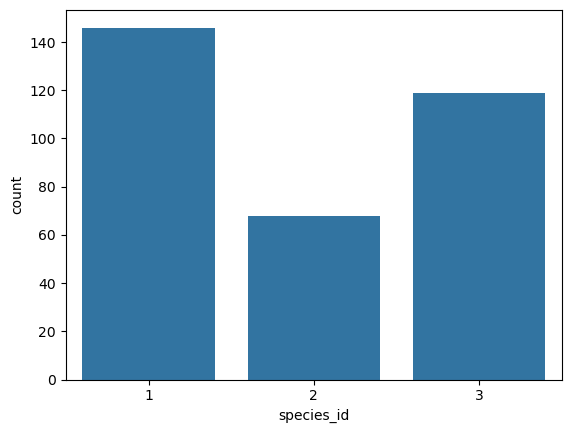

island_id
2    163
3    123
1     47
Name: count, dtype: int64


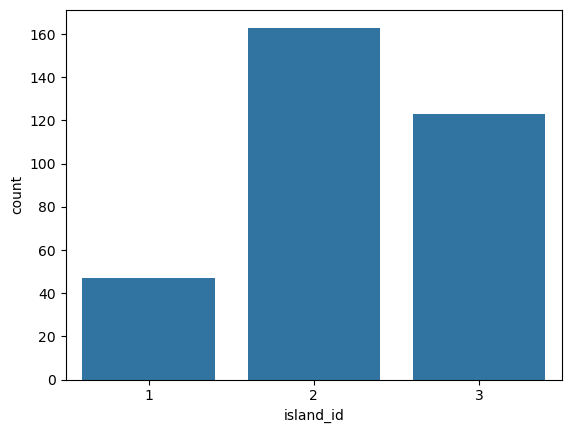

sex_id
1    168
2    165
Name: count, dtype: int64


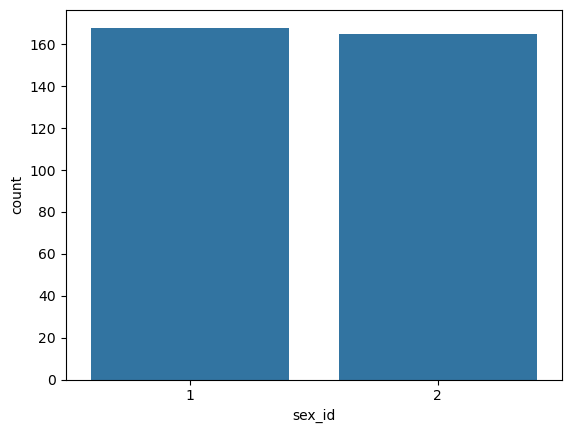

In [39]:
for col in ['species_id', 'island_id', 'sex_id']:
    print(df[col].value_counts())
    sns.countplot(x=col, data=df)
    plt.show()

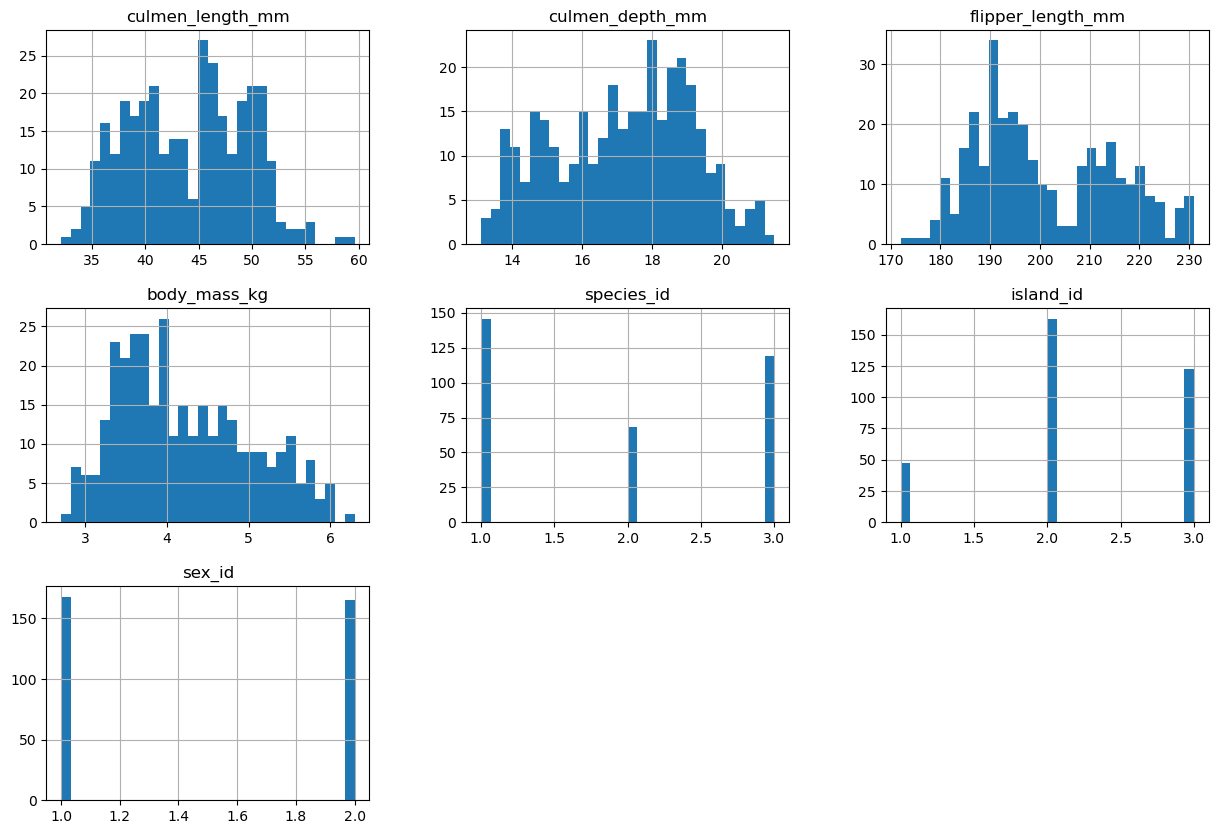

In [40]:
df.hist(figsize = (15,10), bins = 30);

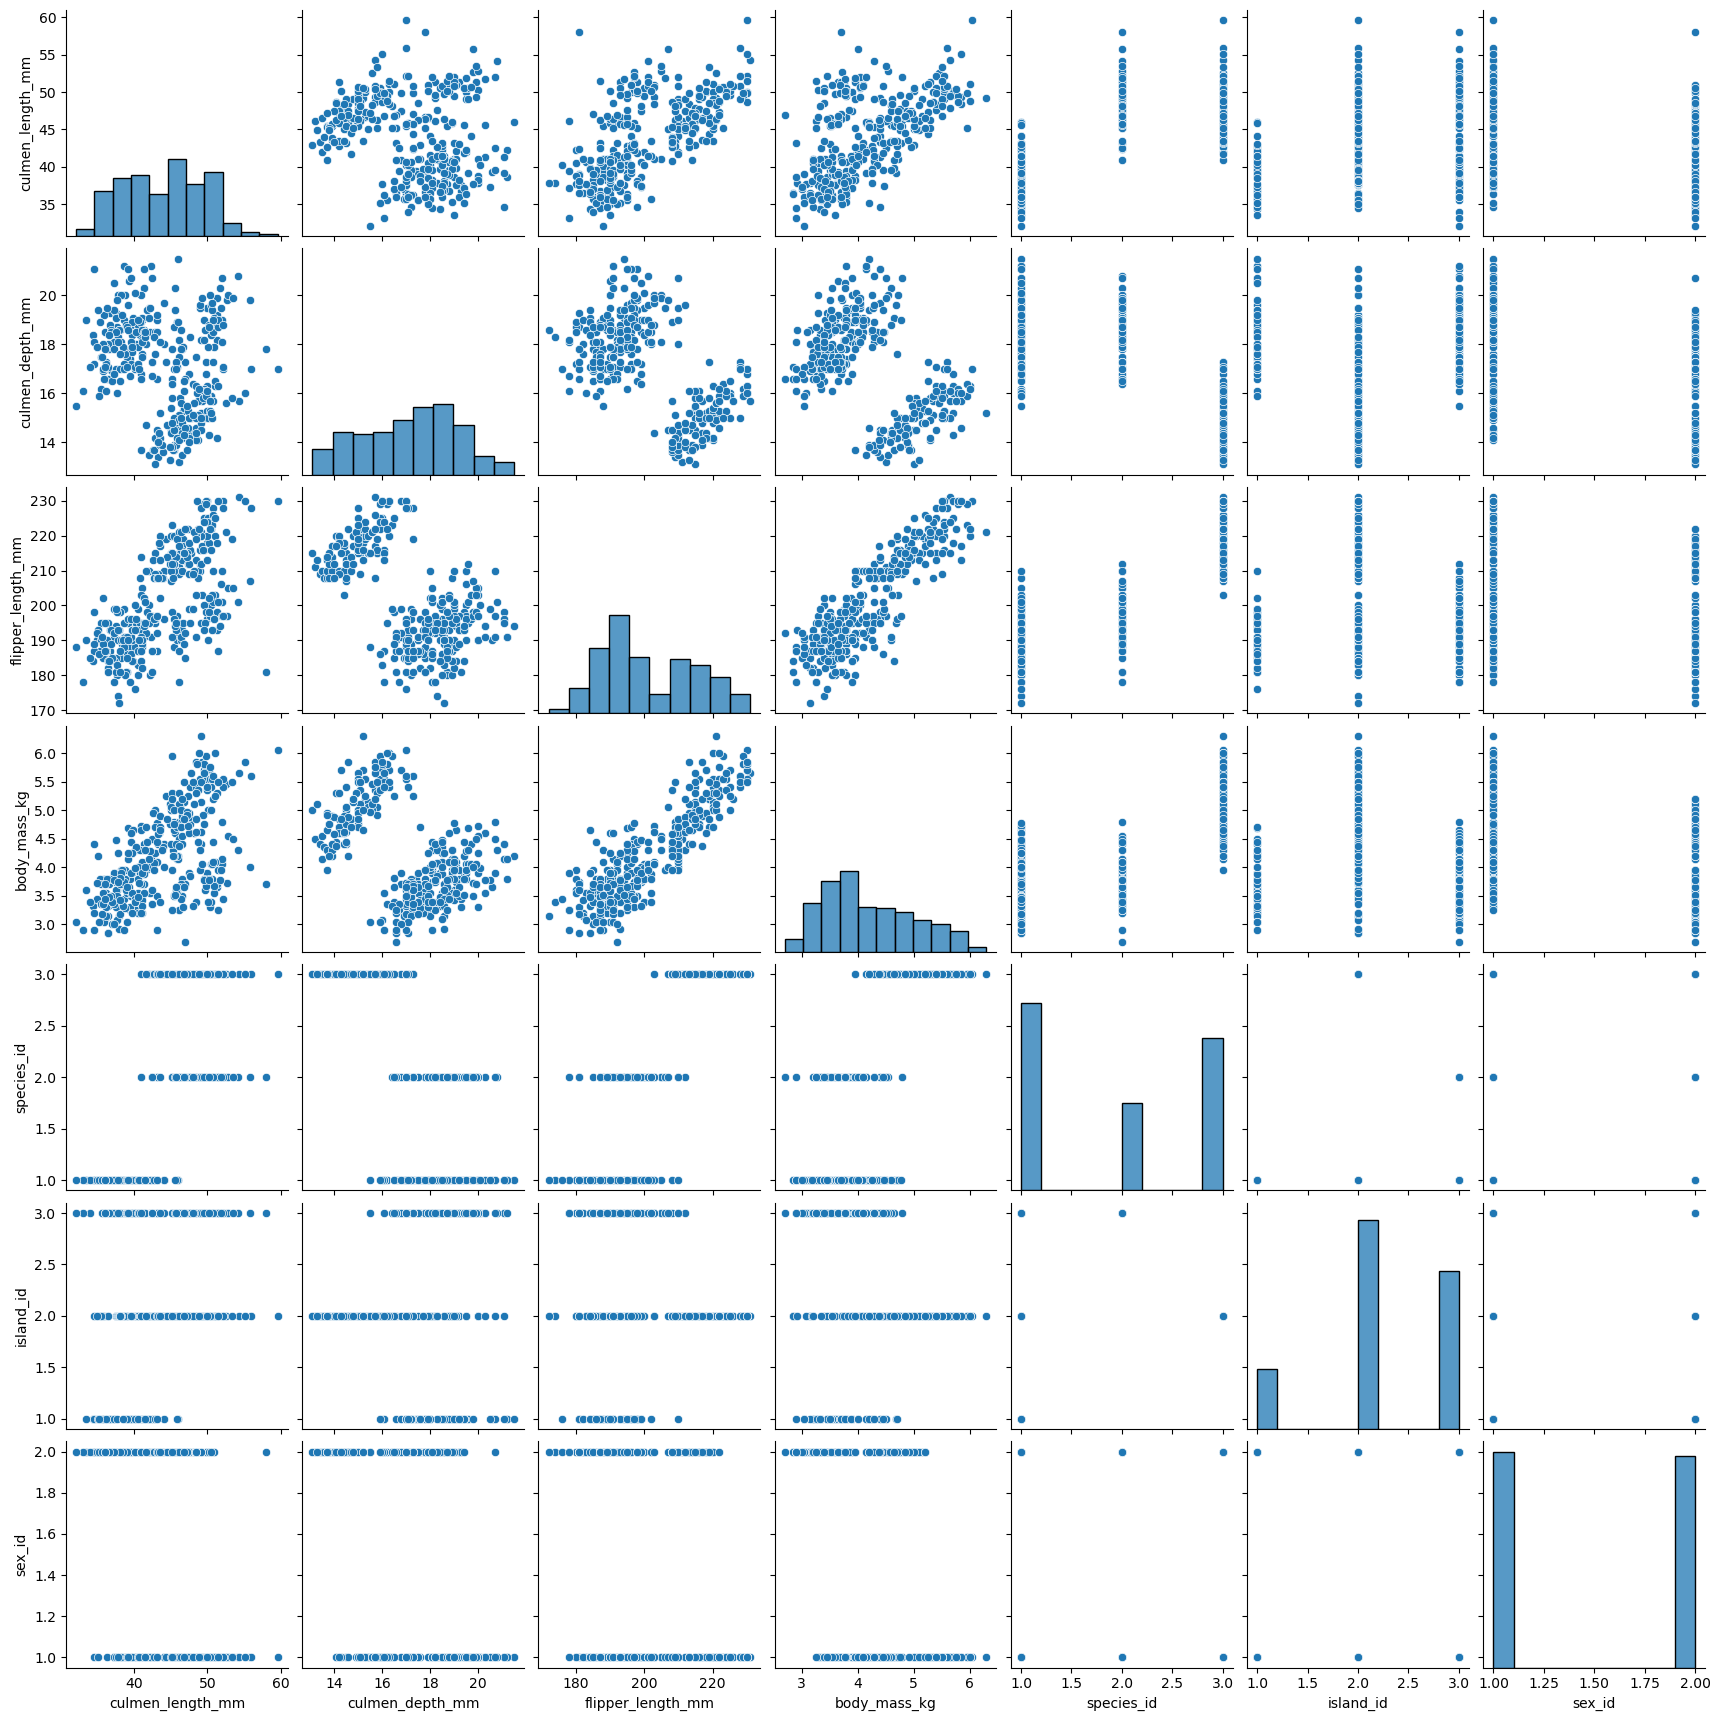

In [41]:
sns.pairplot(df)

<Axes: >

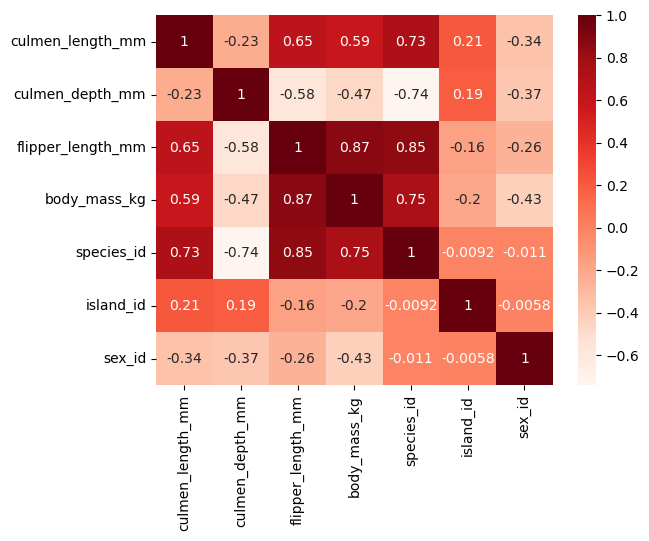

In [42]:
sns.heatmap(df.corr(), annot=True, cmap='Reds')

## Обучение и прогнозирование моделей

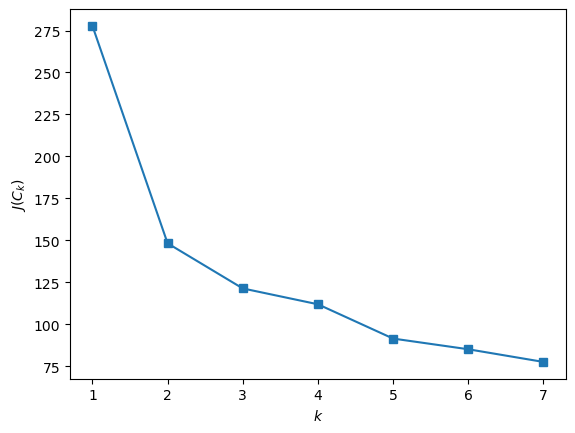

In [44]:
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1, n_init='auto').fit(df)
    inertia.append(np.sqrt(kmeans.inertia_))
    
plt.plot(range(1, 8), inertia, marker="s")
plt.xlabel("$k$")
plt.ylabel("$J(C_k)$");

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

kmeans = KMeans(n_clusters=3, random_state=1, n_init='auto').fit(df)
centroids_pca = pca.fit_transform(kmeans.cluster_centers_)
pred_k = kmeans.labels_

principal_df = pd.DataFrame(data = PCA(n_components=2).fit_transform(df))

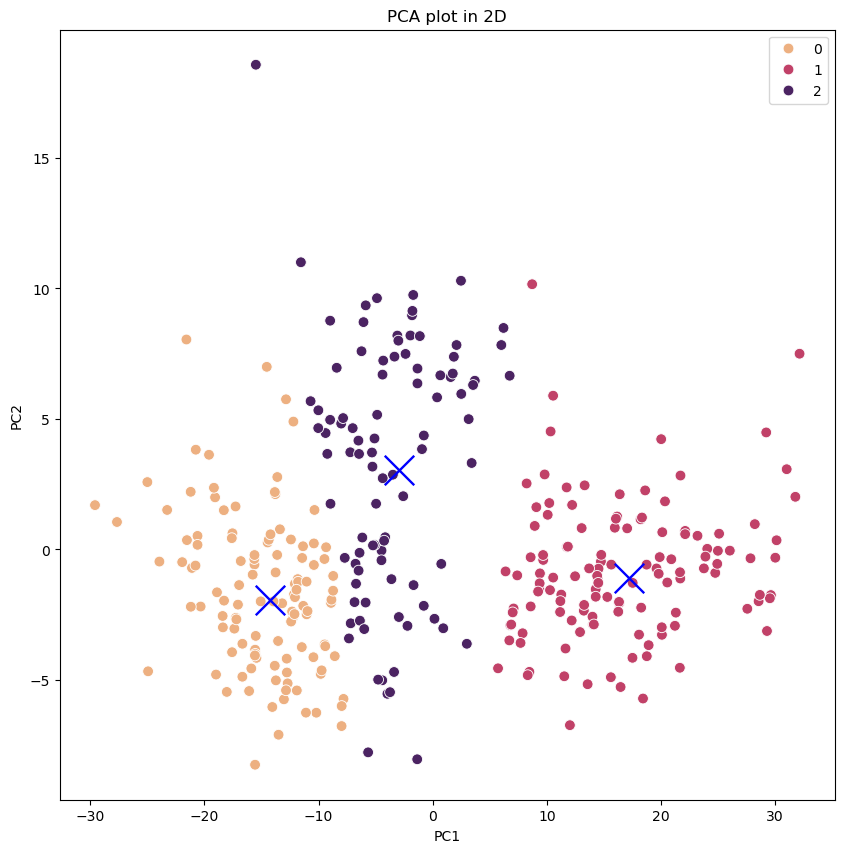

In [46]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                hue = pred_k, 
                palette="flare", 
                s=60)
sns.scatterplot(x = centroids_pca[:,0], 
                y =  centroids_pca[:,1],  
                marker="x", 
                s=450, 
                color = 'blue')
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2');

In [47]:
from sklearn import metrics

In [48]:
print(f'Silhouette score = {metrics.silhouette_score(df, kmeans.labels_, metric='euclidean', sample_size=len(df))}')

Silhouette score = 0.46785828560854065


In [49]:
print(f'Calinski Harabasz score = {metrics.calinski_harabasz_score(df, kmeans.labels_)}')

Calinski Harabasz score = 699.9761925526383


In [50]:
print(f'Davies Bouldin score = {metrics.davies_bouldin_score(df, kmeans.labels_)}')

Davies Bouldin score = 0.8096240222672098


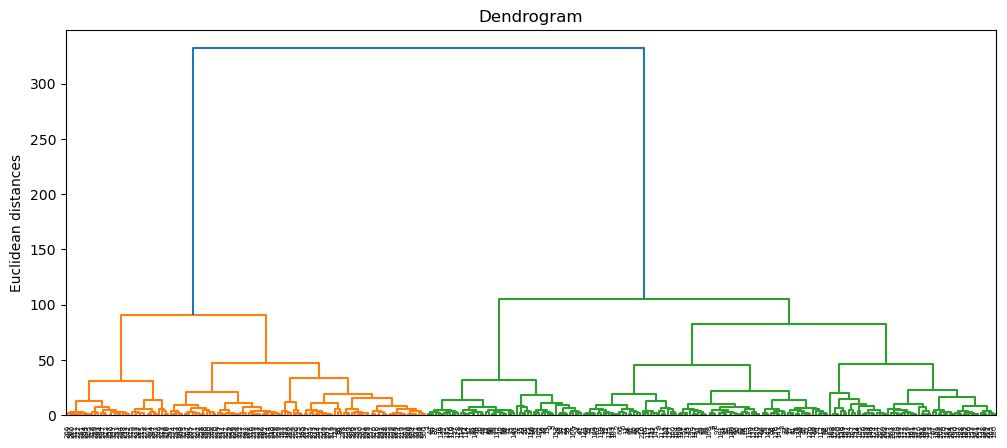

In [51]:
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot
pyplot.figure(figsize=(12, 5))
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

In [52]:
from sklearn.cluster import AgglomerativeClustering
clustering_ward = AgglomerativeClustering(3).fit(df)
pred_ward = clustering_ward.labels_

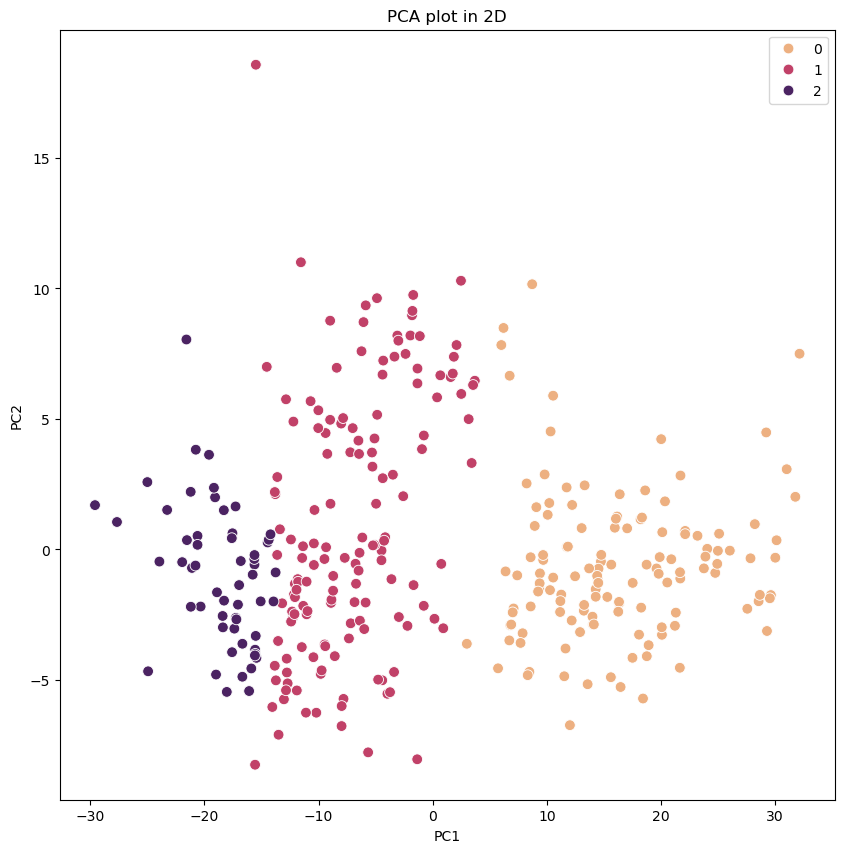

In [53]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                hue = pred_ward, 
                palette="flare", 
                s=60)
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2');

In [54]:
print(f'Silhouette score = {metrics.silhouette_score(df, pred_ward, metric='euclidean', sample_size=len(df))}')

Silhouette score = 0.42367744350243786


In [55]:
print(f'Calinski Harabasz score = {metrics.calinski_harabasz_score(df, pred_ward)}')

Calinski Harabasz score = 607.6005952179829


In [56]:
print(f'Davies Bouldin score = {metrics.davies_bouldin_score(df, pred_ward)}')

Davies Bouldin score = 0.7989153022835304


### Краткий вывод по класстеризации

Данные две модели показали хорошие результаты. Но немного лучше показала себя модель KMeans. Поэтому данные мы берём её.

In [59]:
df['cluster'] = pd.Series(pred_k)

In [81]:
df[df['cluster'] == 0].head(20)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_kg,species_id,island_id,sex_id,cluster
0,39.1,18.7,181.0,3.75,1,1,1,0.0
1,39.5,17.4,186.0,3.80,1,1,2,0.0
4,36.7,19.3,193.0,3.45,1,1,2,0.0
5,39.3,20.6,190.0,3.65,1,1,1,0.0
7,39.2,19.6,195.0,4.68,1,1,1,0.0
13,38.6,21.2,191.0,3.80,1,1,1,0.0
15,36.6,17.8,185.0,3.70,1,1,2,0.0
16,38.7,19.0,195.0,3.45,1,1,2,0.0
17,42.5,20.7,197.0,4.50,1,1,1,0.0
18,34.4,18.4,184.0,3.32,1,1,2,0.0


In [89]:
df[df['cluster'] == 0].describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_kg,species_id,island_id,sex_id,cluster
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.0
mean,39.114286,18.189286,189.366071,3.637500,1.071429,2.142857,1.589286,0.0
std,3.575514,1.247582,6.368554,0.448297,0.258697,0.836737,0.494175,0.0
min,32.100000,15.500000,172.000000,2.850000,1.000000,1.000000,1.000000,0.0
25%,36.575000,17.200000,185.000000,3.300000,1.000000,1.000000,1.000000,0.0
50%,38.650000,18.050000,190.000000,3.565000,1.000000,2.000000,2.000000,0.0
75%,40.600000,18.900000,193.000000,3.900000,1.000000,3.000000,2.000000,0.0
max,51.500000,21.500000,210.000000,4.720000,2.000000,3.000000,2.000000,0.0


In [83]:
df[df['cluster'] == 1].head(20)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_kg,species_id,island_id,sex_id,cluster
89,38.9,18.8,190.0,3.60,1,3,2,1.0
123,41.4,18.5,202.0,3.88,1,1,1,1.0
183,54.2,20.8,201.0,4.30,2,3,1,1.0
186,49.7,18.6,195.0,3.60,2,3,1,1.0
193,46.2,17.5,187.0,3.65,2,3,2,1.0
209,49.3,19.9,203.0,4.05,2,3,1,1.0
212,51.9,19.5,206.0,3.95,2,3,1,1.0
214,45.7,17.0,195.0,3.65,2,3,2,1.0
215,55.8,19.8,207.0,4.00,2,3,1,1.0
216,43.5,18.1,202.0,3.40,2,3,2,1.0


In [91]:
df[df['cluster'] == 1].describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_kg,species_id,island_id,sex_id,cluster
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.0
mean,47.534426,15.383607,215.139344,4.942049,2.877049,2.090164,1.475410,1.0
std,3.324832,1.543548,8.607431,0.615174,0.376541,0.315026,0.501454,0.0
min,38.900000,13.100000,187.000000,3.400000,1.000000,1.000000,1.000000,1.0
25%,45.300000,14.325000,210.000000,4.600000,3.000000,2.000000,1.000000,1.0
50%,47.450000,15.000000,215.000000,4.985000,3.000000,2.000000,1.000000,1.0
75%,49.675000,15.975000,220.750000,5.400000,3.000000,2.000000,2.000000,1.0
max,59.600000,20.800000,231.000000,6.300000,3.000000,3.000000,2.000000,1.0


In [85]:
df[df['cluster'] == 2].head(20)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_kg,species_id,island_id,sex_id,cluster
2,40.3,18.0,195.0,3.25,1,1,2,2.0
6,38.9,17.8,181.0,3.62,1,1,2,2.0
12,41.1,17.6,182.0,3.20,1,1,2,2.0
14,34.6,21.1,198.0,4.40,1,1,1,2.0
30,39.5,16.7,178.0,3.25,1,3,2,2.0
36,38.8,20.0,190.0,3.95,1,3,1,2.0
38,37.6,19.3,181.0,3.30,1,3,2,2.0
55,41.4,18.6,191.0,3.70,1,2,1,2.0
63,41.1,18.2,192.0,4.05,1,2,1,2.0
66,35.5,16.2,195.0,3.35,1,2,2,2.0


In [93]:
df[df['cluster'] == 2].describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_kg,species_id,island_id,sex_id,cluster
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.0
mean,44.761111,18.496667,194.344444,3.808556,1.566667,2.544444,1.411111,2.0
std,5.425692,1.164209,7.318072,0.440938,0.520372,0.751943,0.494792,0.0
min,34.600000,15.000000,178.000000,2.700000,1.000000,1.000000,1.000000,2.0
25%,40.825000,17.800000,190.000000,3.500000,1.000000,2.000000,1.000000,2.0
50%,45.300000,18.600000,195.000000,3.735000,2.000000,3.000000,1.000000,2.0
75%,49.950000,19.275000,198.000000,4.095000,2.000000,3.000000,2.000000,2.0
max,58.000000,21.100000,218.000000,4.950000,3.000000,3.000000,2.000000,2.0


In [60]:
df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_kg         0
species_id           0
island_id            0
sex_id               0
cluster              9
dtype: int64

In [61]:
df.dropna(inplace=True)

In [62]:
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_kg,species_id,island_id,sex_id,cluster
0,39.1,18.7,181.0,3.75,1,1,1,0.0
1,39.5,17.4,186.0,3.80,1,1,2,0.0
2,40.3,18.0,195.0,3.25,1,1,2,2.0
4,36.7,19.3,193.0,3.45,1,1,2,0.0
5,39.3,20.6,190.0,3.65,1,1,1,0.0
...,...,...,...,...,...,...,...,...
328,43.3,14.0,208.0,4.58,3,2,2,1.0
329,48.1,15.1,209.0,5.50,3,2,1,1.0
330,50.5,15.2,216.0,5.00,3,2,2,1.0
331,49.8,15.9,229.0,5.95,3,2,1,1.0


In [63]:
df['cluster'].unique()

array([0., 2., 1.])

cluster
1.0    122
0.0    112
2.0     90
Name: count, dtype: int64


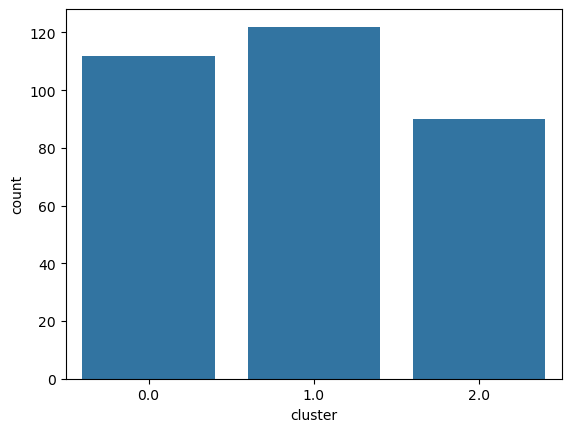

In [64]:
print(df['cluster'].value_counts())
sns.countplot(x='cluster', data=df)
plt.show()

## Обучение модели классификации

In [66]:
X = df.drop('cluster', axis=1)

In [67]:
y = df['cluster']

In [68]:
# Разделяем выборку на обучающую и тестовую 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [69]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(217, 7) (107, 7) (217,) (107,)


### KNeighborsClassifier (Классификация ближайших соседей)

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [73]:
knn_pred_test = knn.predict(X_test)

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_predict))

NameError: name 'y_test_predict' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_test_predict), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Gaussian Naive Bayes (НАИВНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
gnb.fit(X, y)

In [ ]:
gnb_pred_test = gnb.predict(X_test)

In [ ]:
print(classification_report(y_test, gnb_pred_test))

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, gnb_pred_test), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Random Forest Classifier (Классификатор дерева решений)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc  = RandomForestClassifier(criterion = 'gini',
                                    n_estimators = 100,
                                    max_depth = 9,
                                    random_state = 42,
                                    n_jobs = -1)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Краткий вывод по классификации

Данные три модели неплохо предсказывают 1 и 2 классы, у них у всех проблема с 3. 3 класс Каждая модель предсказывает чуть больше 0.5. Лучше всего 3 класс предсказала модель: 
- KNeighborsClassifier.

# Общий вывод

## В данной работе было проделано:
- подключение модулей (import modules)
- загрузка данных (data lodaing)
- разведочный анализ данных (exploratory data analysis, EDA)
- предварительная обработка данных (preprocessing)
- визуальный анализ(Visual analysis)
- обучение и прогнозирование моделей класстеризации (models fitting and prediction)
- обучение и прогнозирование моделей классификации (models fitting and prediction)

После просмотренных результатов по предсказанию моделей, самая лучшая модель кластеризации оказалась:
- KMeans.

После просмотренных результатов по предсказанию моделей, самая лучшая модель классификации оказалась:
- KNeighborsClassifier.